# Open files ( scores & lat and lon)

In [3]:
    from osgeo import gdal
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt
        
    src_lat='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lat_2.npy'
    lat_arr = np.array(np.load(src_lat))
    lat_arr = np.flipud(lat_arr)
    lat_arr_slice=lat_arr[400:1543 ,0:5313]#[400:1543 ,3000:4000]


    
    src_lon='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lon_2.npy'
    lon_arr = np.array(np.load(src_lon))
    lon_arr = np.flipud(lon_arr)
    lon_arr_slice=lon_arr[400:1543 ,0:5313]#[400:1543 ,3000:4000]

    print(lon_arr_slice.shape)

    

(1143, 5313)


# Deep learning Result

In [4]:
    
    src_z='/Users/reem/Documents/DeepLearning/code/showResultOnMap/scores.npy'
    z_score_arr = np.array(np.load(src_z))
    z_score_arr = np.flipud(z_score_arr)

    score_slice=z_score_arr[400:1543 ,:]

# CCD Result 

In [11]:
filepath67 = r"/Users/reem/projAlaith/merged/interferograms/20181108_20181120/filt_fine.cor"
filepath68 = r"/Users/reem/projAlaith/merged/interferograms/20181120_20181202/filt_fine.cor"

ds67 = np.array(gdal.Open(filepath67).ReadAsArray())
ds68 = np.array(gdal.Open(filepath68).ReadAsArray())

CCD=np.subtract(ds67,ds68)
#np.save('subtract_coh1108-1120-1202.npy', coh1)
CCD = np.flipud(CCD)

CCD_slice=CCD[400:1543 ,0:5313]

# Show In Figure

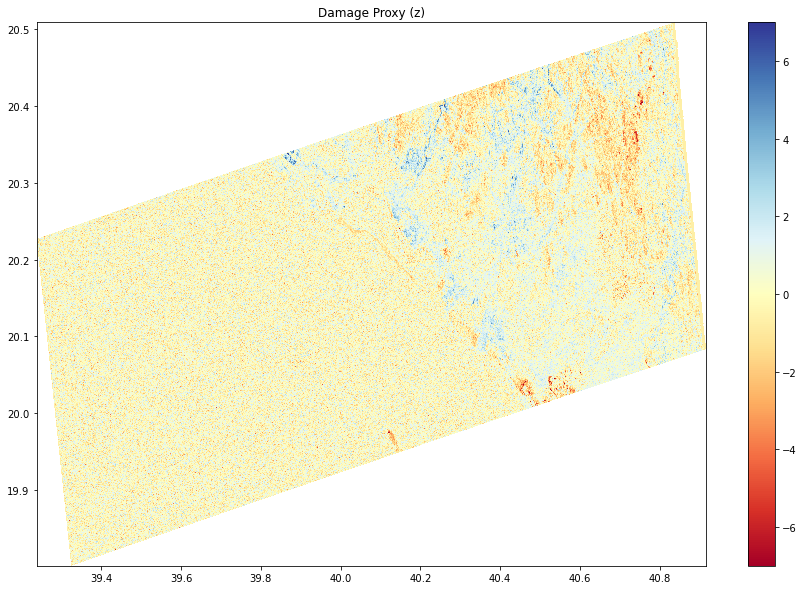

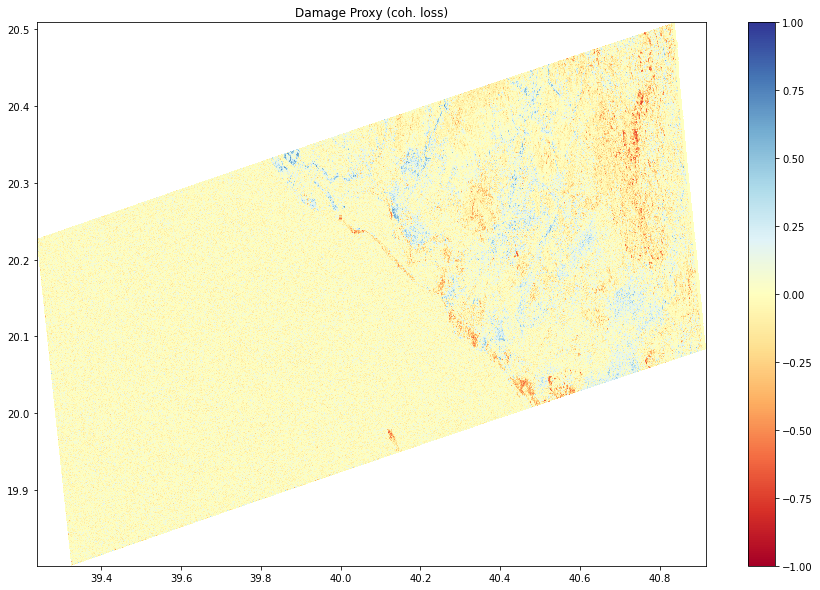

In [10]:
  
    
    plt.figure(figsize=(15,10)) 

    #score_slice = np.ma.masked_array(score_slice, score_slice > -1)
   # cmap = plt.cm.Reds
   # plt.pcolormesh(z, vmin=-5, vmax=5, cmap="RdYlBu")
    
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,score_slice[:-1, :-1],vmin=-7, vmax=7,cmap="RdYlBu") #vmin=-5, vmax=1
    plt.colorbar()  
    plt.title("Damage Proxy (z)") 

    plt.savefig('RNN_pcolormesh.tif')
    plt.show()
    
    plt.figure(figsize=(15,10)) 
    
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice[:-1, :-1],vmin=-1, vmax=1, cmap="RdYlBu") #vmin=-5, vmax=1
    plt.colorbar()  
    plt.title("Damage Proxy (coh. loss)") 

    plt.savefig('CCD_pcolormesh.tif')
    plt.show()